<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-FranciscoMedellin/blob/main/Semana_6_Modulo_03_Notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python Module 03 Exploratory Data Analysis
- Francisco Medellin Zertuche 
- A01794044

In this module we’re going to cover the basics of Exploratory Data Analysis using Python. Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
- Summarize main characteristics of the data 
- Gain better understanding of the dataset,
- Uncover relationships between different variables, and
- Extract important variables for the problem we are trying to solve.

The main question we are trying to answer in this module is:
*“What are the characteristics that have the most impact on the car price?”*
For this we will be going through a couple of different useful exploratory data analysis techniques

**Learning Objectives:**
- Descriptive Statistics, which describe basic features of a dataset and obtains a short summary about the sample and measures of the data.
- Basic of Grouping Data using groupby, and how this can help to transform our dataset.
- ANOVA, the analysis of variance, a statistical method in which the variation in a set of observations is divided into distinct components.
- Correctlation, Statistics.The Correlation between different variables.
And lastly, ***Advanced Correlation***, where we’ll introduce you to various correlation statistical methods, namely ***Pearson Correlation*** and ***Correlation Heatmaps***.

# Descriptive Statistics
When you begin to analyze data, it’s important to first explore your data before you spend
time building complicated models. One easy way to do so is to calculate some
descriptive statistics for your data. Descriptive statistical analysis helps to
describe basic features of a dataset and obtains a short summary about the sample and measures
of the data. 


- Describe basic features of data.
- Giving short summaries baout the sample and measures of the data.

**Describe()** <br>

Summarize statstics using mandas methond
```
df.describe()
```



**Value_Counts()** <br>
You could have also categorical variables
in your dataset. These are variables that can be divided up into different categories,
or groups and have discrete values.<br>

Summarize the categorical data is by using the value_counts() method.

```
drive_wheels_counts = df["drive-wheels"].value_counts()

# rename the columns
drive_wheels_counts.rename(colunms={"drive-wheels":"value_counts"}, inplace = True)

# print
drive_wheels_counts.index.name = "drive-wheels"
```

Result:<br>

|                   | value_counts |
|-------------------|--------------|
| drive-wheels      |      0       |
|     fwd           |      118       |
|     rwd           |      75       |
|     4wd           |      8       |




### **Box Plots** <br>
Boxplots are a great way to visualize numeric
data, since you can visualize the various distributions of the data.

The main features that the boxplot shows are the median of the data, which represents where
the middle datapoint is. <br>

The Upper Quartile shows where the 75th percentile is, the Lower Quartile shows where the 25th percentile is. The data between the Upper and Lower Quartile represents the Interquartile Range.<br>

Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile. <br>

Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes. With boxplots, you can easily spot outliers and also see the distribution and skewness of the data.

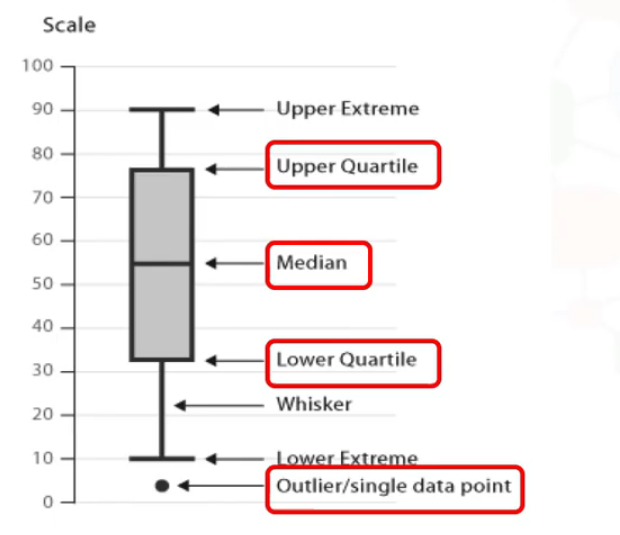

Boxplots make it easy to compare between groups.<br> 

In this example, using Boxplot we can see the distribution of different categories of the “drive-wheels” feature over price feature.<br> 

We can see that the distribution of price between the rwd (rear wheel drive) and the other categories are distinct, but the price for fwd (front wheel drive) and 4wd (four wheel drive) are almost indistinguishable.

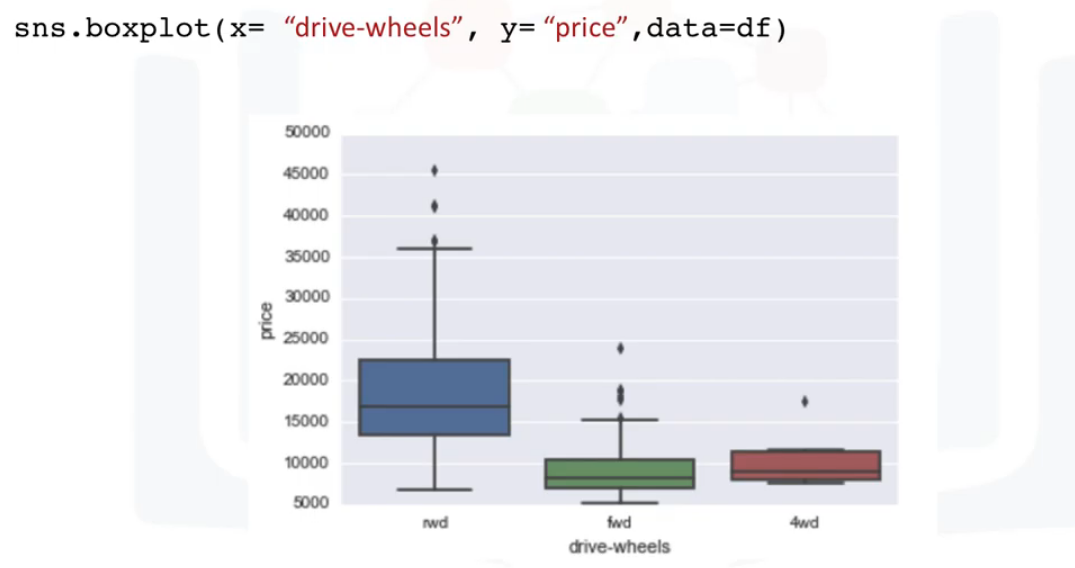

### Scatter Plot
Often times we tend to see continuous variables in our data. These data points are numbers
contained in some range.

- Each observation represented as a point.
- Scatter plot show the relationship between two variables.
  - Predictor variable/ independet variables on x-axis.
  - Target variable/ dependent variables on y-axis.

For example, in our dataset, price and engine
size are continuous variables. What if we want to understand the relationship
between “engine size” and ”price”? Could engine size possibly predict the price
of a car? One good way to visualize this is using a scatter plot.<br>

Each observation in a scatter plot is represented as a point. This plot shows the relationship between two variables:

-The predictor variable: is the variable that you are using to predict an outcome. In this
case, our predictor variable is the engine size.
- The target variable: is the variable that you are trying to predict. In this case, our
target variable is the price, since this would be the outcome.

In a scatterplot, we typically set the predictor variable on the x-axis, or horizontal axis and we set the target variable on the y-axis or vertical axis.

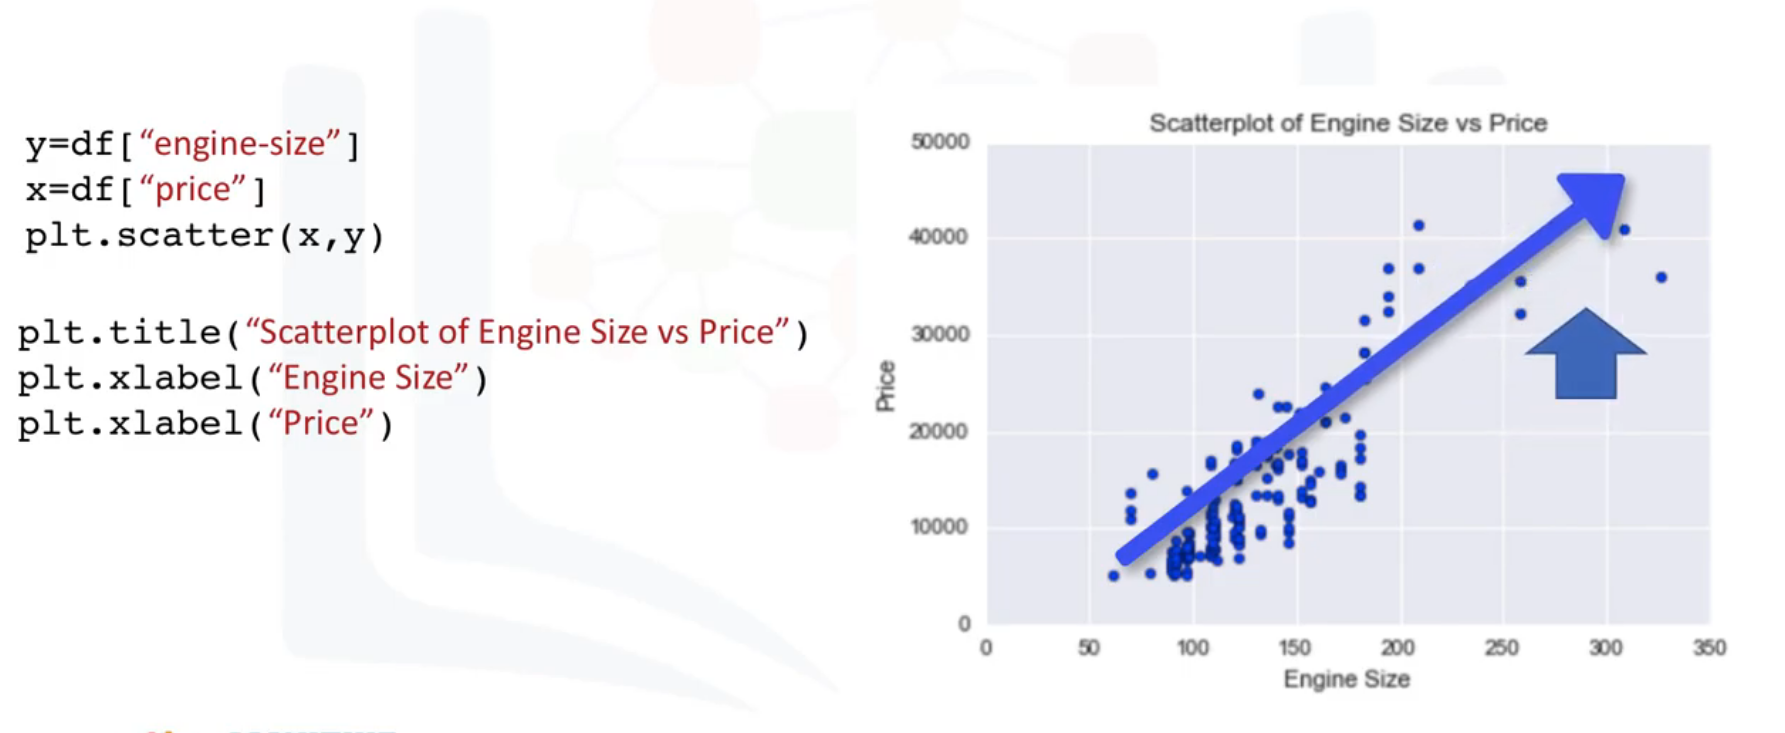

In this case, we will thus plot the engine size on the x-axis and the price on the y-axis.
We are using the Matplotlib function “scatter” here, taking in x and a y variable.<br>

Something to note is that it’s always important to label your axes and write a general plot title, so that you know what you are looking at. <br>

Now how is the variable Engine Size related to Price? <br>
From the scatterplot we see that
as the engine size goes up, the price of the car also goes up.<br>
This is giving us an initial indication that there is a positive linear relationship between
these two variables.


# GroupBy in Python

Assume you want to know: Is there any relationship between the different types of “drive system” (forward, rear and four-wheel drive) and the “price” of the vehicles? <br>
If so, which type of “drive system” adds the most value to a vehicle?

It would be nice if we could group all the data by the different types of drive wheels,
and compare the results of these different drive wheels against each other.<br>
In pandas this can be done using the group by method.

**Groupping data** <br>

- Use df.Groupby() method:
  - Can be applied on categorical variables
  - Group data into categories.
  - Single or multiple variables

### Groupby() Example


Let’s say we are interested in finding the average price of vehicles and observe how they differ between different types of “body-style” and “drive-wheels”
variables.<br>

To do this, we first pick out the three data columns we are interested in, which is done
in the first line of code.<br>
```
df_test = df[["drive-wheels","body-style","price"]]
```

Then group the reduced data according to ‘drive-wheels’ and ‘body-style’ in the second line.
```
df_grp = df_test.groupby(["drive-wheels","body-style"], as_index=False).mean()
```

We can see that, according to our data, rear wheel drive convertibles and rear wheel drive
hardtops have the highest value, while four wheel drive hatchbacks have the lowest value.<br>

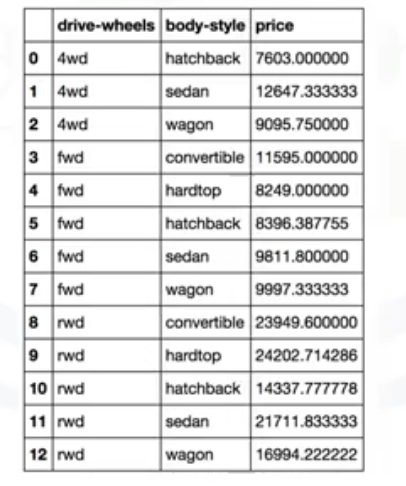

A table of this form isn’t the easiest to read, and also not very easy to visualize.<br>

To make it easier to understand, we can transform this table to a pivot table by using the pivot
method.

### Pivot Method
In the previous table, both ‘drive-wheels’ and ‘body-style’ were listed in columns.<br>

A pivot table has one variable displayed along the columns and the other variable displayed
along the rows.


```
df_pivot = df_grp.pivot(index = "drive-wheels", columns= "body-style")
```



The price data now becomes a rectangular grid, which is easier to visualize.

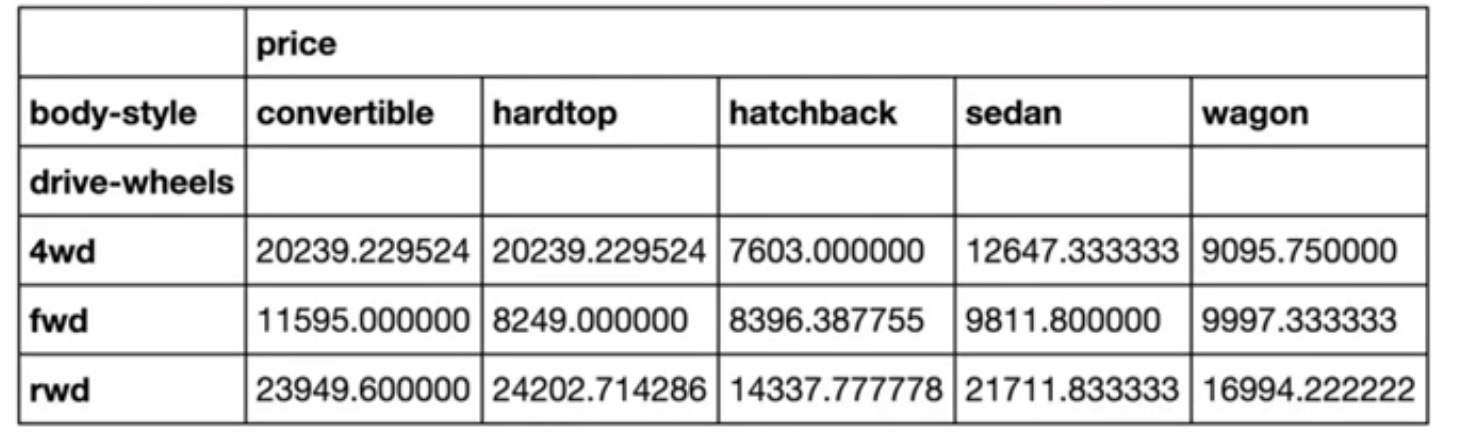

### Heatmap
Another way to represent the pivot table is using a heatmap plot. <br>
Heatmap takes a rectangular grid of data and assigns a color intensity based on the
data value at the grid points.

- Plot target variable over multiple variables.
- Relations beteween varibales and the target

Example: Convert previous pivot table into a graphical form.
```
plt.pcolot(df_pivot , cmap="RdBu")
plt.colorbar()
plt.show()
```



In the output plot, each type of “body-style” is numbered along the x-axis, and each type
of “drive wheels” is numbered along the y-axis.<br>

The average prices are plotted with varying colors based on their values, according to
the color bar. <br>

We see that the top section of the heatmap seems to have higher prices than the bottom
section.

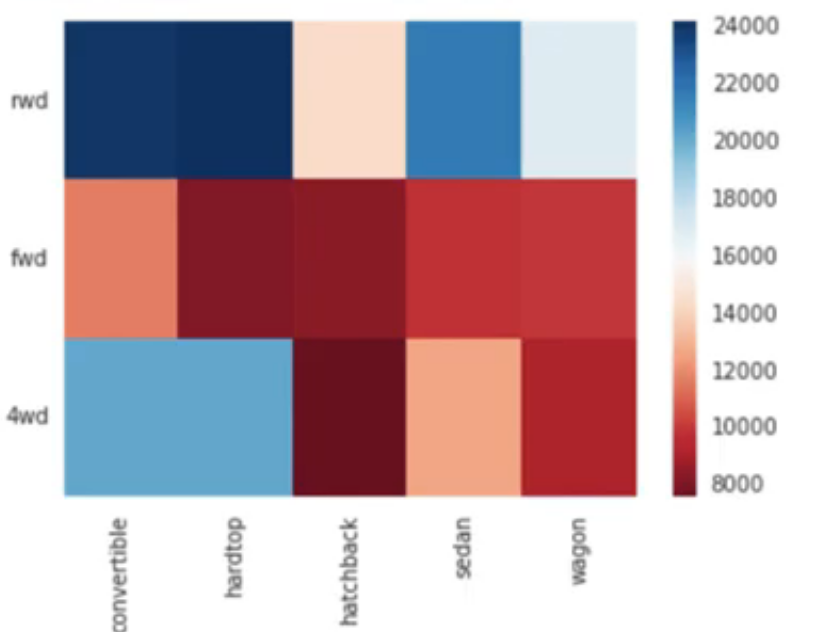

# Analysis of Variance ANOVA 

Assume that we want to analyze a categorical variable and see the correlation among different categories.

- Statistical comparison of groups.
- Example: average price of different vehicle makes.

For example, consider the car dataset, the question we may ask is, how different categories of the Make feature (as a categorical variable) has impact on the price?

The diagram shows the average price of different vehicle makes.
We do see a trend of increasing prices as we move right along the graph.<br>

But which category in the make feature has the most and which one has the least impact
on the car price prediction?


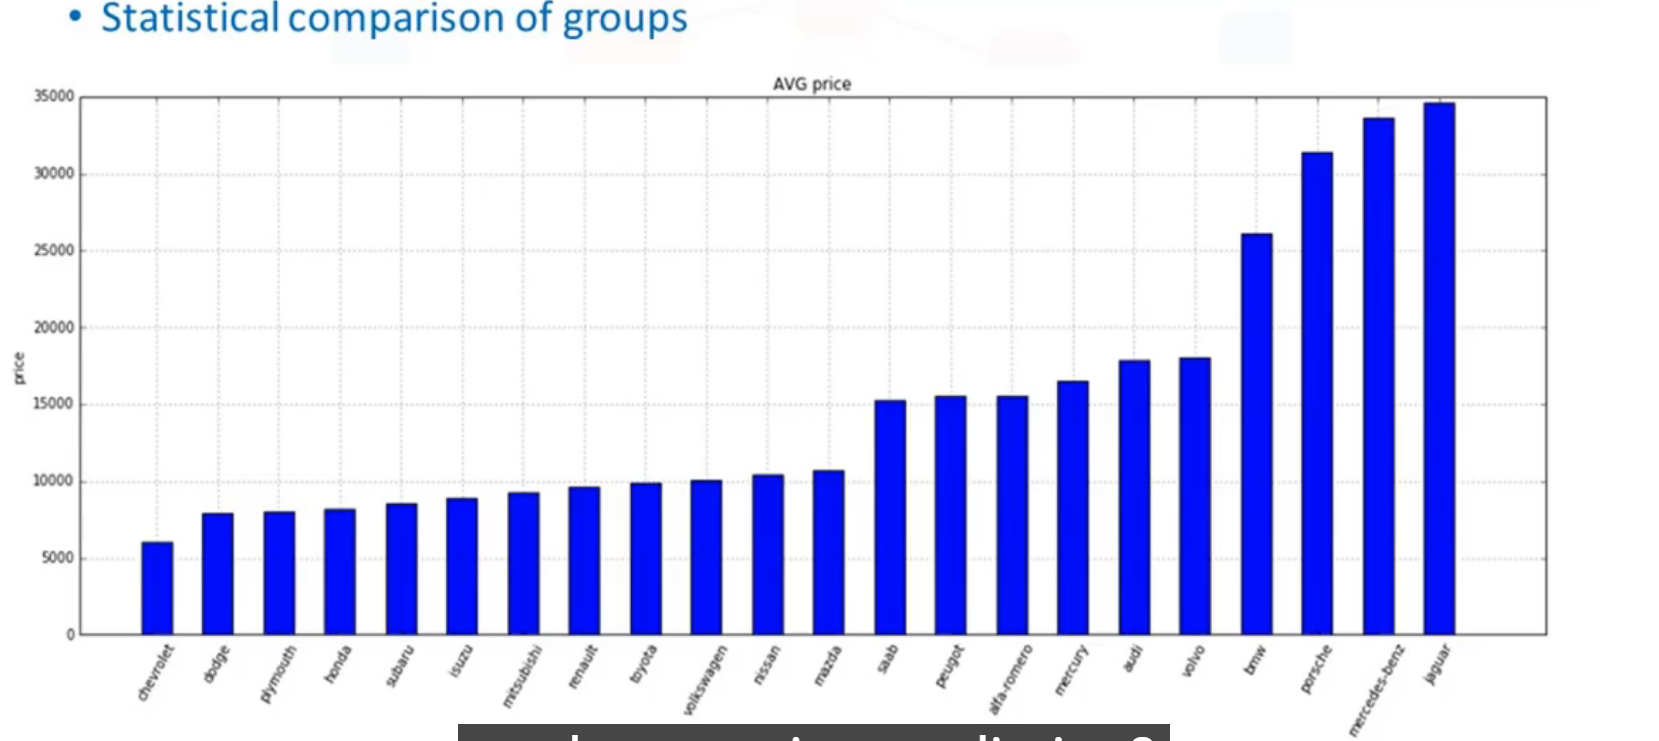

To analyze categorical variables such as the
"make" variable, we can use a method such
as the ANOVA method.

**ANOVA** is a statistical test that stands for "Analysis of Variance". <br>
ANOVA can be used to find the correlation between different groups of a categorical
variable.